# Modeling: Rectangular plate with multiple bodies

You can create multiple bodies from a single sketch by extruding the same sketch in different planes.

The sketch is designed as an effective *functional-style* API with all operations receiving 2D configurations.
For more information, see the :ref:`Sketch <ref_sketch>` subpackage.

In this example, a box is located in the center of the plate, with the default origin of a sketch plane
(origin at ``(0, 0, 0)``). Four holes of equal radius are sketched at the corners of the plate.
The plate is then extruded, leading to the generation of the requested body. The projection is at
the center of the face. The default projection depth is through the entire part.

## Perform required imports

Perform the required imports.

In [1]:
import numpy as np
from pint import Quantity

from ansys.geometry.core import Modeler
from ansys.geometry.core.math import Plane, Point3D, Point2D, UnitVector3D
from ansys.geometry.core.misc import UNITS
from ansys.geometry.core.sketch import Sketch

## Define sketch profile

The sketch profile for the proposed design requires four segments that constitute
the outer limits of the design, a box on the center, and a circle at its four corners.

You can use a single ``sketch`` instance for multiple design operations, including extruding a body,
projecting a profile, and imprinting curves.

Define the sketch profle for the rectangular plate with multiple bodies.

In [2]:
sketch = Sketch()
(sketch.segment(Point2D([-4, 5], unit=UNITS.m), Point2D([4, 5], unit=UNITS.m))
    .segment_to_point(Point2D([4, -5], unit=UNITS.m))
    .segment_to_point(Point2D([-4, -5], unit=UNITS.m))
    .segment_to_point(Point2D([-4, 5], unit=UNITS.m))
    .box(Point2D([0,0], unit=UNITS.m), Quantity(3, UNITS.m), Quantity(3, UNITS.m))
    .circle(Point2D([3, 4], unit=UNITS.m), Quantity(0.5, UNITS.m))
    .circle(Point2D([-3, -4], unit=UNITS.m), Quantity(0.5, UNITS.m))
    .circle(Point2D([-3, 4], unit=UNITS.m), Quantity(0.5, UNITS.m))
    .circle(Point2D([3, -4], unit=UNITS.m), Quantity(0.5, UNITS.m))
)

## Extrude sketch to create design

Establish a server connection and use the single sketch profile to extrude
the base component at the Z axis. Create a named selection from the
resulting list of bodies. In only three server calls, the design extrudes
the four segments with the desired thickness.

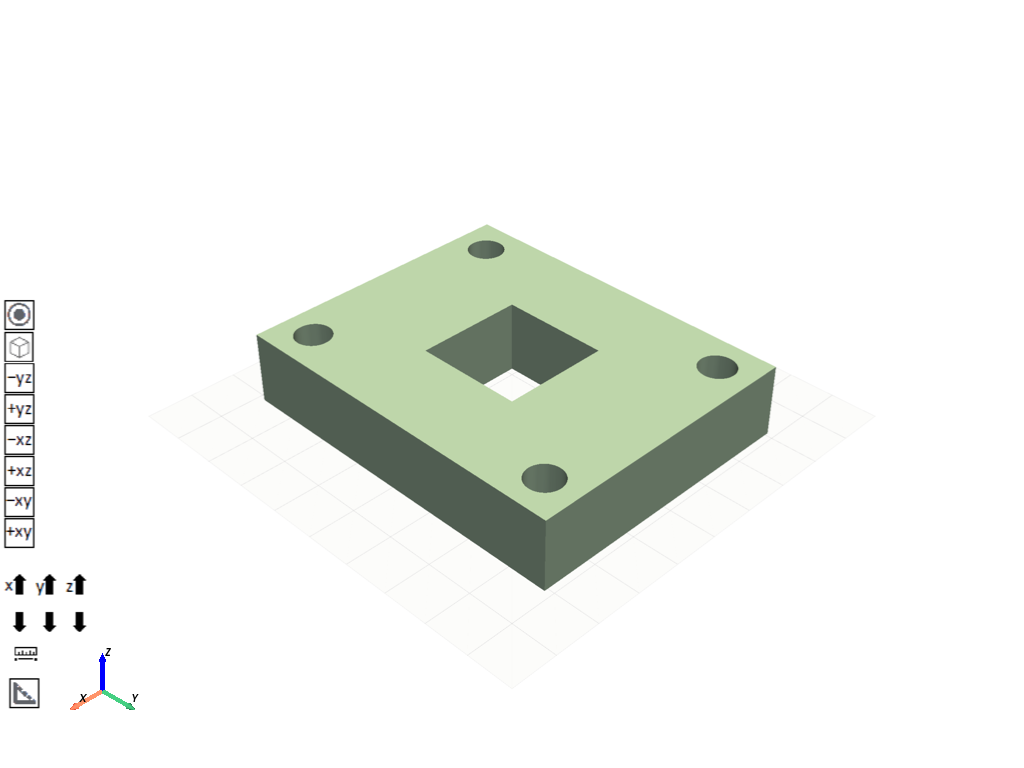

In [3]:
modeler = Modeler()
design = modeler.create_design("ExtrudedPlate")

body = design.extrude_sketch(f"PlateLayer", sketch, Quantity(2, UNITS.m))

board_named_selection = design.create_named_selection("Plate", bodies=[body])
design.plot()

## Add component with a planar surface

After creating a plate as a base component, you might want to add a component with a planar
surface to it.

Create a ``sketch`` instance and then create a surface in the design with this sketch.
For the sketch, it creates an ellipse, keeping the origin of the plane as its center.

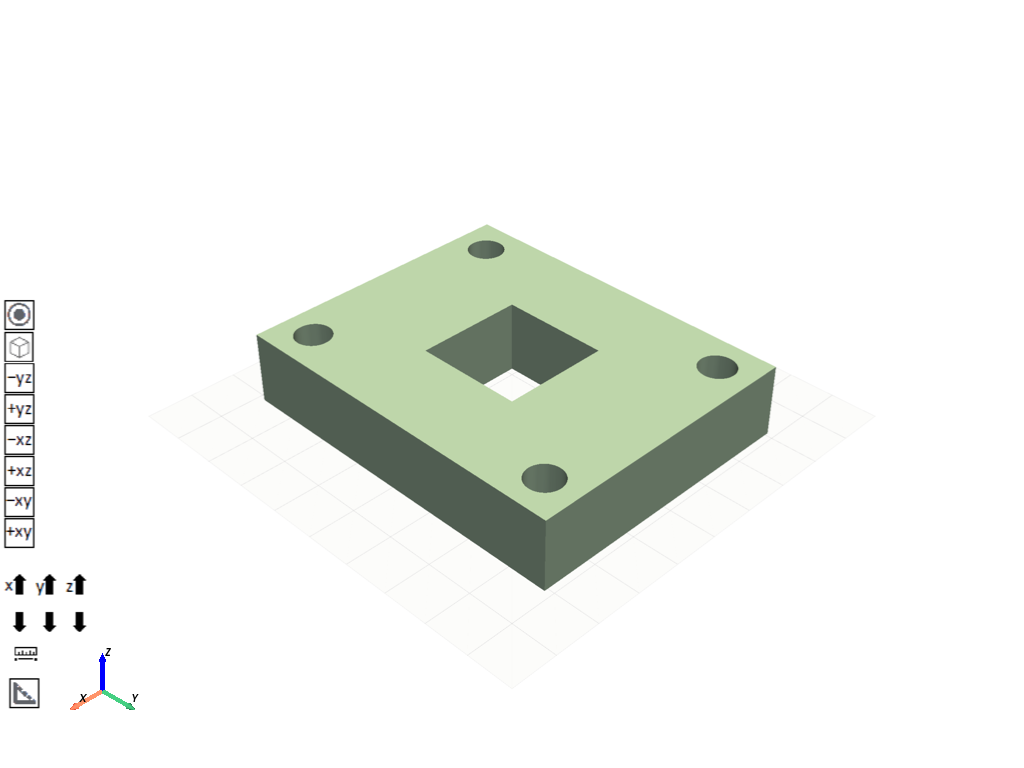

In [4]:
# Add components to the design
planar_component = design.add_component("PlanarComponent")

# Initiate ``Sketch`` to create the planar surface.
planar_sketch = Sketch()
planar_sketch.ellipse(
        Point2D([0, 0], UNITS.m), Quantity(1, UNITS.m), Quantity(0.5, UNITS.m)
    )

planar_body = planar_component.create_surface("PlanarComponentSurface", planar_sketch)

comp_str = repr(planar_component)
design.plot()

## Extrude from face to create body

Extrude a face profile by a given distance to create a solid body. There are no
modifications against the body containing the source face.

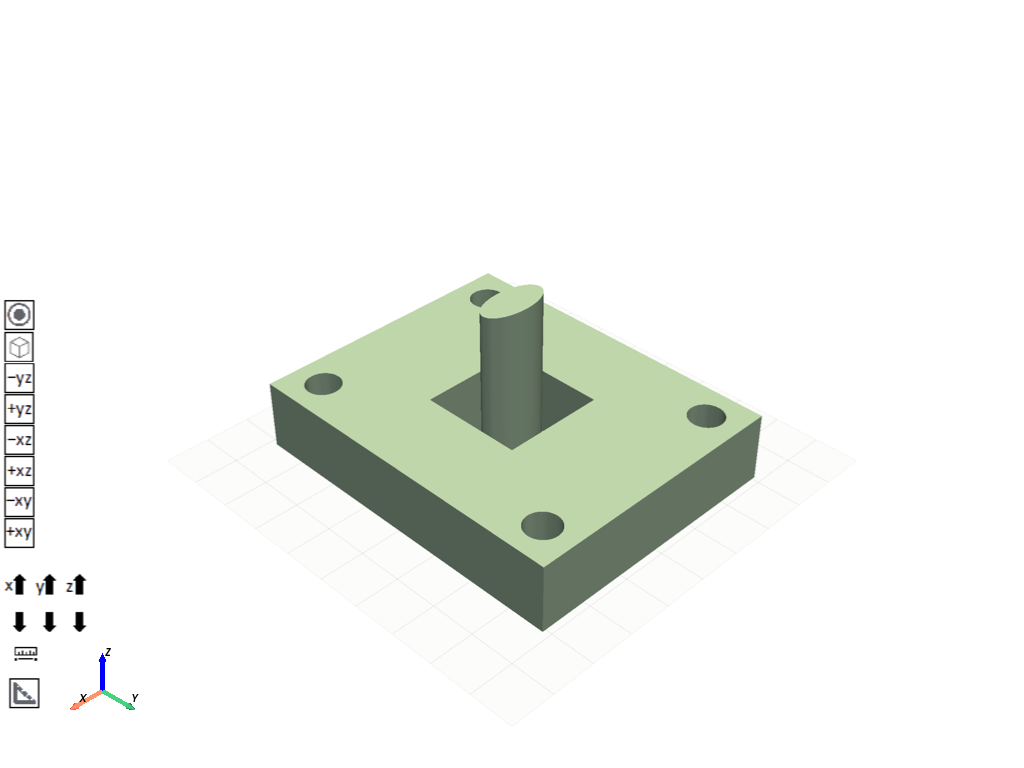

In [5]:
longer_body = design.extrude_face(
        "LongerEllipseFace", planar_body.faces[0], Quantity(5, UNITS.m)
    )
design.plot()

## Translate body within plane

Use the :func:`translate()<ansys.geometry.core.designer.body.Body.translate>` method
to move the body in a specified direction by a given distance. You can also move
a sketch around the global coordinate system. For more information, see the
[Dynamic Sketch Plane](../02_sketching/dynamic_sketch_plane.mystnb) example.

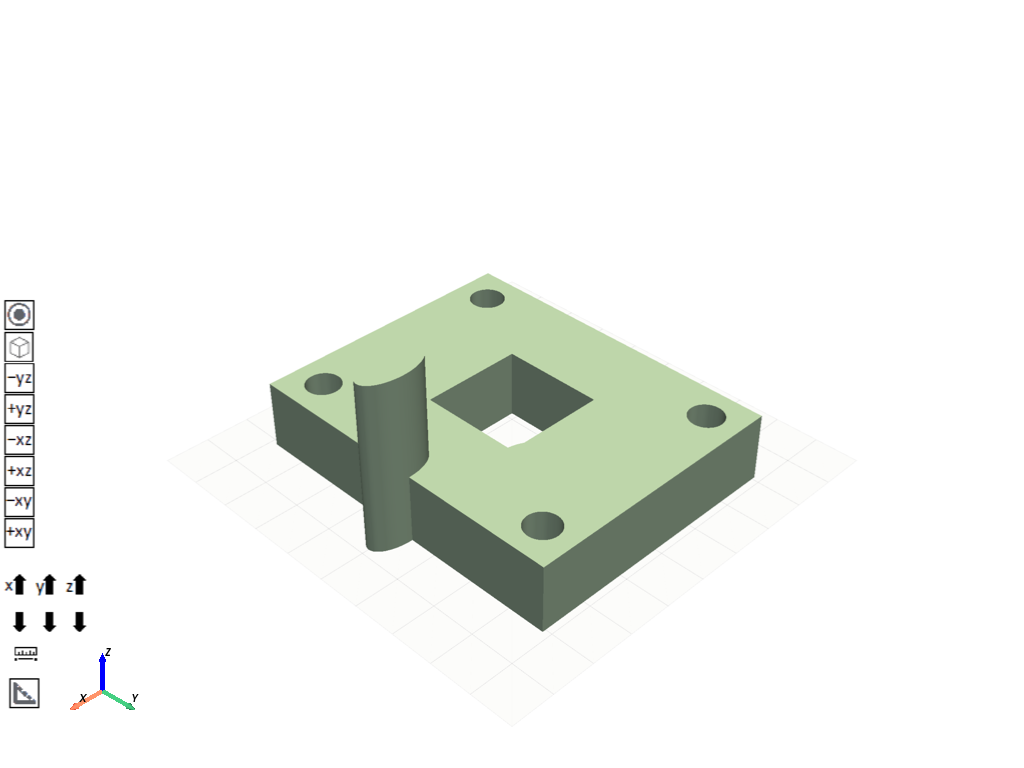

In [6]:
longer_body.translate(UnitVector3D([1, 0, 0]), Quantity(4, UNITS.m))
design.plot()